# Mini-Project 3

In [187]:
import gensim
import gensim.downloader as api  # load 
from gensim.similarities import Similarity #
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Loading Data

#### Load the word2vec-google-news-300 pretrained embedding model

In [188]:
word2vec_300 = api.load("word2vec-google-news-300")

#### Loading synonyms

In [189]:
synonyms = pd.read_csv("synonyms.csv")

In [190]:
# our own test case
synonyms1 = pd.read_csv("synonyms1.csv")

In [191]:
synonyms.head()

,question,answer,0,1,2,3
0,enormously,tremendously,appropriately,uniquely,tremendously,decidedly
1,provisions,stipulations,stipulations,interrelations,jurisdictions,interpretations
2,haphazardly,randomly,dangerously,densely,randomly,linearly
3,prominent,conspicuous,battered,ancient,mysterious,conspicuous
4,zenith,pinnacle,completion,pinnacle,outset,decline


#### Vocab

In [274]:
# vocab  
vocab = word2vec_300.index_to_key 

#### Create output files

In [275]:
## file
f = open("word2vec-google-news-300-details.csv", "w")
f.close()

In [276]:
f = open("analysis.csv", "w")
f.write("model"+","+"Vocab Size"+","+"correc label"+",""answered without guessing"+","+"accuracy"+"\n")

f.close()

## Some test cases

In [240]:
word2vec_300.most_similar("car")

[('vehicle', 0.7821096181869507),
 ('cars', 0.7423830032348633),
 ('SUV', 0.7160962224006653),
 ('minivan', 0.6907036304473877),
 ('truck', 0.6735789775848389),
 ('Car', 0.6677608489990234),
 ('Ford_Focus', 0.6673202514648438),
 ('Honda_Civic', 0.6626849174499512),
 ('Jeep', 0.651133120059967),
 ('pickup_truck', 0.6441437602043152)]

In [196]:
word2vec_300.similarity('car', 'car'  )

1.0

In [197]:
word2vec_300.similarity('car', 'Auto'  ) #?

0.43913448

## Task 1 ( Evaluation of the word2vec-google-news-300 Pre-trained Model )

### Part 1 of task 1 ( predict the synonym and append the result of questions to csv file)

In [277]:
total_correct = 0
total_guess = 0

f = open("word2vec-google-news-300-details.csv", "a")
for i, row in synonyms.iterrows():
    answer = row[1]
    question = row[0]
    predict = row[(random.randint(2, 5))]
    if(row[0] in vocab):
        q= np.array( [word2vec_300.similarity(question,  word ) if word in vocab else -1000 for word in (row[2:])] )
        max =np.argmax(q)
        if (q[max] != -1000):
                predict = row[max+2]
                if predict == answer:
                    total_correct += 1
                    f.write(question+","+answer+","+predict+",correct\n")
                    print(f'{question},{answer},{predict},correct')
                else:
                    f.write(question+","+answer+","+predict+",wrong\n")
                    print(f'{question},{answer},{predict},wrong')
        else:
            total_guess += 1
            f.write(question+","+answer+","+predict+",guess\n")
            print(f'{question},{answer},{predict},guess')
            
    else:
        total_guess += 1
        f.write(question+","+answer+","+predict+",guess\n")
        print(f'{question},{answer},{predict},guess')
                
        
f.close()               

enormously,tremendously,tremendously,correct
provisions,stipulations,stipulations,correct
haphazardly,randomly,randomly,correct
prominent,conspicuous,conspicuous,correct
zenith,pinnacle,pinnacle,correct
flawed,imperfect,imperfect,correct
urgently,desperately,desperately,correct
consumed,eaten,eaten,correct
advent,coming,coming,correct
concisely,succinctly,succinctly,correct
salutes,greetings,ceremonies,wrong
solitary,alone,restless,wrong
hasten,accelerate,accelerate,correct
perseverance,endurance,generosity,wrong
fanciful,imaginative,imaginative,correct
showed,demonstrated,demonstrated,correct
constantly,continually,continually,correct
issues,subjects,subjects,correct
furnish,supply,impress,wrong
costly,expensive,expensive,correct
recognized,acknowledged,acknowledged,correct
spot,location,location,correct
make,earn,earn,correct
often,frequently,frequently,correct
easygoing,relaxed,relaxed,correct
debate,argument,argument,correct
narrow,thin,thin,correct
arranged,planned,planned,correct

### Part 2 of task 1 (analysis.csv)

#### Model name

In [278]:
model_name = "word2vec-google-news-300"
vector_size = len(word2vec_300[0])

#### Size of vocabulary

In [279]:
g300_vocab_size = len(vocab)
print(g300_vocab_size)

3000000


#### Number of correct labels

In [280]:
g300_total_correct = total_correct
print(g300_total_correct)

70


#### Number of questions answered without guessing

In [281]:
g300_total_no_guess = len(synonyms) - total_guess
print(g300_total_no_guess)

79


#### Accuracy of model

In [282]:
g300_accuracy = total_correct / total_no_guess
print(g300_accuracy)

0.8974358974358975


In [283]:
f = open("analysis.csv", "a")
f.write(model_name+","+repr(g300_vocab_size)+","+repr(g300_total_correct)+","+repr(g300_total_no_guess)+","+repr(g300_accuracy)+"\n")
f.close()

## Task 2 (Comparison with Other Pre-trained Models)

### Part 1 of task 2  (2 new models from different corpora but same embedding size (=50)

### Loading the models

In [27]:
word2vec_twitr_50 = api.load("glove-twitter-50")


[==================================================] 100.0% 199.5/199.5MB downloaded


In [28]:
word2vec_wiki_50 = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [284]:
vocab1 = word2vec_twitr_50.index_to_key 
vocab2 = word2vec_wiki_50.index_to_key 

#### Create output files

In [285]:
f = open("glove-twitter-50-details.csv", "w")
f.close()

In [286]:
f = open("glove-wiki-gigaword-50-details.csv", "w")
f.close()

### word2vec_twitr_50

In [287]:
total_correct = 0
total_guess = 0

f = open("glove-twitter-50-details.csv", "a")

for i, row in synonyms.iterrows():
    answer = row[1]
    question = row[0]
    predict = row[(random.randint(2, 5))]
    if(row[0] in vocab1):
        q= np.array( [word2vec_twitr_50.similarity(question,  word ) if word in vocab1 else -1000 for word in (row[2:])] )
        max =np.argmax(q)
        if (q[max] != -1000):
                predict = row[max+2]
                if predict == answer:
                    total_correct += 1
                    f.write(question+","+answer+","+predict+",correct\n")
                    #print(f'{question},{answer},{predict},correct')
                else:
                    f.write(question+","+answer+","+predict+",wrong\n")
                    #print(f'{question},{answer},{predict},wrong')
        else:
            total_guess += 1
            f.write(question+","+answer+","+predict+",guess\n")
            #print(f'{question},{answer},{predict},guess')
            
    else:
        total_guess += 1
        f.write(question+","+answer+","+predict+",guess\n")
        #print(f'{question},{answer},{predict},guess')
                
        
f.close()        

###### Analysis of word2vec_twitr_50

In [288]:
t50_model_name = "glove-twitter-50-details"
t50_vector_size = len(word2vec_twitr_50[0])
t50_vocab_size = len(vocab1)
t50_total_no_guess = len(synonyms) - total_guess
t50_accuracy = total_correct / total_no_guess
t50_total_correct = total_correct

print(f'{t50_model_name} \n')
print(f'Vector Size : {t50_vector_size}')
print(f'Vocab Size : {t50_vocab_size}')
print(f'Toatal correct : {t50_total_correct}') 
print(f'Answered without guessing : {t50_total_no_guess}')
print(f'Accuracy: {t50_accuracy}')

glove-twitter-50-details 

Vector Size : 50
Vocab Size : 1193514
Toatal correct : 36
Answered without guessing : 78
Accuracy: 0.46153846153846156


###### Output Analysys

In [289]:
f = open("analysis.csv", "a")
f.write(t50_model_name+","+repr(t50_vocab_size)+","+repr(t50_total_correct)+","+repr(t50_total_no_guess)+","+repr(t50_accuracy)+"\n")
f.close()

### word2vec_wiki_50

In [290]:
total_correct = 0
total_guess = 0

f = open("glove-wiki-gigaword-50-details.csv", "a")

for i, row in synonyms.iterrows():
    answer = row[1]
    question = row[0]
    predict = row[(random.randint(2, 5))]
    if(row[0] in vocab2):
        q= np.array( [word2vec_wiki_50.similarity(question,  word ) if word in vocab2 else -1000 for word in (row[2:])] )
        max =np.argmax(q)
        if (q[max] != -1000):
                predict = row[max+2]
                if predict == answer:
                    total_correct += 1
                    f.write(question+","+answer+","+predict+",correct\n")
                    #print(f'{question},{answer},{predict},correct')
                else:
                    f.write(question+","+answer+","+predict+",wrong\n")
                    #print(f'{question},{answer},{predict},wrong')
        else:
            total_guess += 1
            f.write(question+","+answer+","+predict+",guess\n")
            #print(f'{question},{answer},{predict},guess')
            
    else:
        total_guess += 1
        f.write(question+","+answer+","+predict+",guess\n")
        #print(f'{question},{answer},{predict},guess')
                
        
f.close()   

###### Analysis of word2vec_wiki_50

In [291]:
w50_model_name = "glove-wiki-gigaword-50-details"
w50_vector_size = len(word2vec_wiki_50[0])
w50_vocab_size = len(vocab2)
w50_total_no_guess = len(synonyms) - total_guess
w50_accuracy = total_correct / total_no_guess
w50_total_correct=total_correct

print(f'{w50_model_name} \n')
print(f'Vector Size : {w50_vector_size}')
print(f'Vocab Size : {w50_vocab_size}')
print(f'Toatal correct : {w50_total_correct}') 
print(f'Answered without guessing : {w50_total_no_guess}')
print(f'Accuracy: {w50_accuracy}')

glove-wiki-gigaword-50-details 

Vector Size : 50
Vocab Size : 400000
Toatal correct : 57
Answered without guessing : 80
Accuracy: 0.7307692307692307


#### Output 

In [292]:
f = open("analysis.csv", "a")
f.write(w50_model_name+","+repr(w50_vocab_size)+","+repr(w50_total_correct)+","+repr(w50_total_no_guess)+","+repr(w50_accuracy)+"\n")
f.close()

### Part 1 of task 2  (. 2 new models from the same corpus but different embedding sizes)

### Loading the models

In [93]:
word2vec_twitr_25 = api.load("glove-twitter-25")

[==================================================] 100.0% 104.8/104.8MB downloaded


In [107]:
word2vec_twitr_200 = api.load("glove-twitter-200")

In [293]:
vocab3 = word2vec_twitr_25.index_to_key 
vocab4 = word2vec_twitr_200.index_to_key 

#### Create output files

In [294]:
f = open("glove-twitter-25-details.csv", "w")
f.close()

In [295]:
f = open("glove-twitter-200-details.csv", "w")
f.close()

### glove-twitter-25

In [296]:
total_correct = 0
total_guess = 0

f = open("glove-twitter-25-details.csv", "a")

for i, row in synonyms.iterrows():
    answer = row[1]
    question = row[0]
    predict = row[(random.randint(2, 5))]
    if(row[0] in vocab3):
        q= np.array( [word2vec_twitr_25.similarity(question,  word ) if word in vocab3 else -1000 for word in (row[2:])] )
        max =np.argmax(q)
        if (q[max] != -1000):
                predict = row[max+2]
                if predict == answer:
                    total_correct += 1
                    f.write(question+","+answer+","+predict+",correct\n")
                    #print(f'{question},{answer},{predict},correct')
                else:
                    f.write(question+","+answer+","+predict+",wrong\n")
                    #print(f'{question},{answer},{predict},wrong')
        else:
            total_guess += 1
            f.write(question+","+answer+","+predict+",guess\n")
            #print(f'{question},{answer},{predict},guess')
            
    else:
        total_guess += 1
        f.write(question+","+answer+","+predict+",guess\n")
        #print(f'{question},{answer},{predict},guess')
                
        
f.close()        

###### Analysis of word2vec_wiki_25

In [297]:
t25_model_name = "glove-twitter-25-details"
t25_vector_size = len(word2vec_twitr_25 [0])
t25_vocab_size = len(vocab3)
t25_total_no_guess = len(synonyms) - total_guess
t25_accuracy = total_correct / total_no_guess
t25_total_correct=total_correct

print(f'{t25_model_name} \n')
print(f'Vector Size : {t25_vector_size}')
print(f'Vocab Size : {t25_vocab_size}')
print(f'Toatal correct : {t25_total_correct}') 
print(f'Answered without guessing : {t25_total_no_guess}')
print(f'Accuracy: {t25_accuracy}')

glove-twitter-25-details 

Vector Size : 25
Vocab Size : 1193514
Toatal correct : 36
Answered without guessing : 78
Accuracy: 0.46153846153846156


###### Output Analysys

In [298]:
f = open("analysis.csv", "a")
f.write(t25_model_name+","+repr(t25_vocab_size)+","+repr(t25_total_correct)+","+repr(t25_total_no_guess)+","+repr(t25_accuracy)+"\n")
f.close()

### glove-twitter-200

In [299]:
total_correct = 0
total_guess = 0

f = open("glove-twitter-200-details.csv", "a")

for i, row in synonyms.iterrows():
    answer = row[1]
    question = row[0]
    predict = row[(random.randint(2, 5))]
    if(row[0] in vocab4):
        q= np.array( [word2vec_twitr_200.similarity(question,  word ) if word in vocab4 else -1000 for word in (row[2:])] )
        max =np.argmax(q)
        if (q[max] != -1000):
                predict = row[max+2]
                if predict == answer:
                    total_correct += 1
                    f.write(question+","+answer+","+predict+",correct\n")
                    #print(f'{question},{answer},{predict},correct')
                else:
                    f.write(question+","+answer+","+predict+",wrong\n")
                    #print(f'{question},{answer},{predict},wrong')
        else:
            total_guess += 1
            f.write(question+","+answer+","+predict+",guess\n")
            #print(f'{question},{answer},{predict},guess')
            
    else:
        total_guess += 1
        f.write(question+","+answer+","+predict+",guess\n")
        #print(f'{question},{answer},{predict},guess')
                
        
f.close()  

###### Analysis of word2vec_wiki_200

In [300]:
t200_model_name = "glove-twitter-200-details"
t200_vector_size = len(word2vec_twitr_200[0])
t200_vocab_size = len(vocab3)
t200_total_no_guess = len(synonyms) - total_guess
t200_accuracy = total_correct / total_no_guess
t200_total_correct = total_correct

print(f'{t200_model_name} \n')
print(f'Vector Size : {t200_vector_size}')
print(f'Vocab Size : {t200_vocab_size}')
print(f'Toatal correct : {t200_total_correct}') 
print(f'Answered without guessing : {t200_total_no_guess}')
print(f'Accuracy: {t200_accuracy}')

glove-twitter-200-details 

Vector Size : 200
Vocab Size : 1193514
Toatal correct : 44
Answered without guessing : 78
Accuracy: 0.5641025641025641


###### Output Analysis Analysis of word2vec_wiki_200

In [301]:
f = open("analysis.csv", "a")
f.write(t200_model_name+","+repr(t200_vocab_size)+","+repr(t200_total_correct)+","+repr(t200_total_no_guess)+","+repr(t200_accuracy)+"\n")
f.close()

## Random 

In [302]:
f = open("Random-details.csv", "w")
f.close()

In [303]:
total_correct = 0
total_guess = 0

f = open("Random-details.csv", "a")

for i, row in synonyms.iterrows():
    answer = row[1]
    question = row[0]
    predict = row[(random.randint(2, 5))]

    if predict == answer:
        total_correct += 1
        f.write(question+","+answer+","+predict+",correct\n")
        #print(f'{question},{answer},{predict},correct')
    else:
        f.write(question+","+answer+","+predict+",wrong\n")
        #print(f'{question},{answer},{predict},wrong')

                
        
f.close()

In [304]:
rand_model_name = "Random-details"

rand_accuracy = total_correct / len(synonyms)
rand_total_correct = total_correct

print(f'{rand_model_name} \n')
print(f'Toatal correct : {rand_total_correct}') 
print(f'Accuracy: {rand_accuracy}')

Random-details 

Toatal correct : 20
Accuracy: 0.25


## Comparision

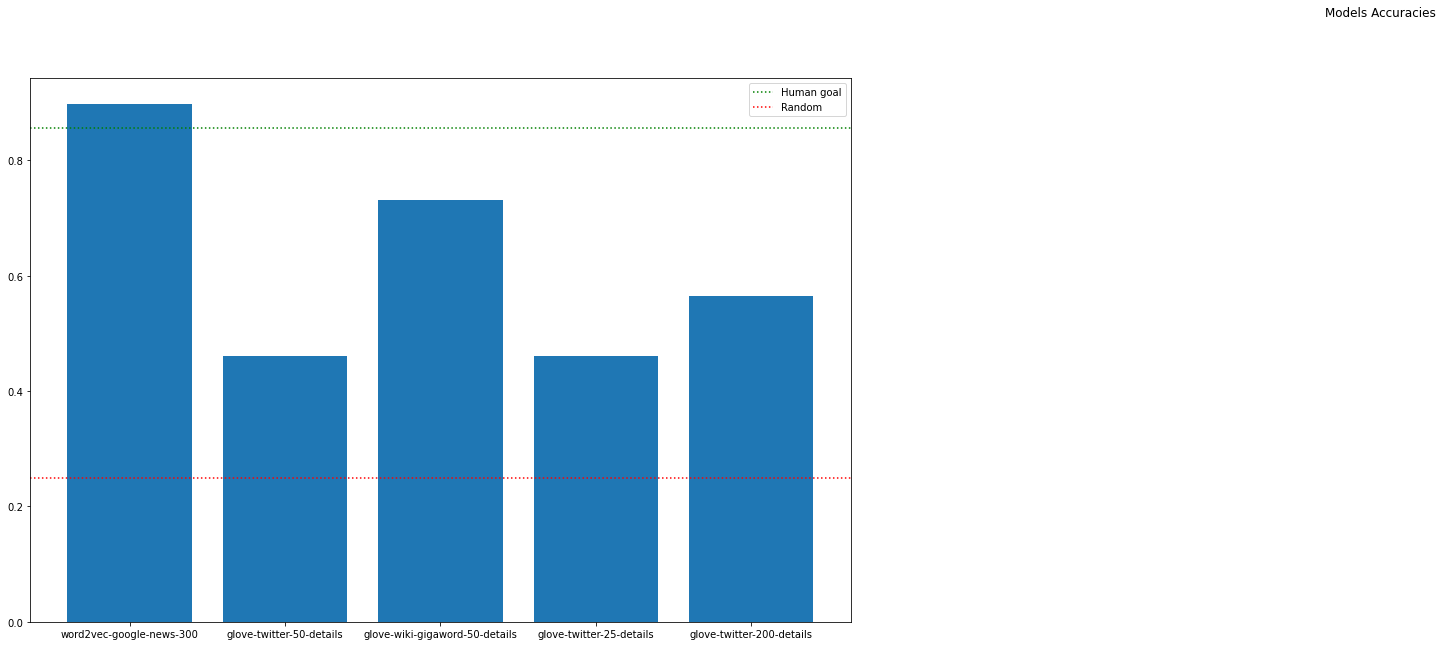

In [309]:
models = [model_name, t50_model_name, w50_model_name, t25_model_name, t200_model_name ]
Acuracies = [g300_accuracy, t50_accuracy, w50_accuracy, t25_accuracy,t200_accuracy]

plt.figure(figsize=(50, 10))

plt.subplot(131)
plt.bar(models, Acuracies)
plt.suptitle('Models Accuracies')
plt.axhline(y=0.8557, color='g', linestyle='dotted', label="Human goal")
plt.axhline(y=rand_accuracy, color='r', linestyle='dotted', label="Random")
plt.legend()

plt.show()

In [306]:
anlys = pd.read_csv('analysis.csv', delimiter=',') 

In [307]:
anlys.head(7)

,model,Vocab Size,correc label,answered without guessing,accuracy
0,word2vec-google-news-300,3000000,70,79,0.897436
1,glove-twitter-50-details,1193514,36,78,0.461538
2,glove-wiki-gigaword-50-details,400000,57,80,0.730769
3,glove-twitter-25-details,1193514,36,78,0.461538
4,glove-twitter-200-details,1193514,44,78,0.564103


As We can see eventhough twitter50 has more unique words compared to Wiki50 it still has lower accuracy
and that because in twitter documents words has not nessasarily been used gramatically corect or even i meanigfull way that represent the word actuall meaning whereas on wikipedia words aremore likely to be used in its correct format and thtas why with even lower vocab size we get better acuracy for this set of words

On the other hand we see that increasing the embading size can also result in some improvment s and the reason is more weight being used to determind the meaning of  a word 


## Thank you